# Exploratory Data Analysis

#### Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [3]:
with open("data/winequality.csv", "r") as f:
    df = pd.read_csv(f)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

#### Pre-Process

In [5]:
f"Number of Null Rows: {sum(df.isnull().any(axis=1))}"

'Number of Null Rows: 0'

#### Explore Features

1. Distributions

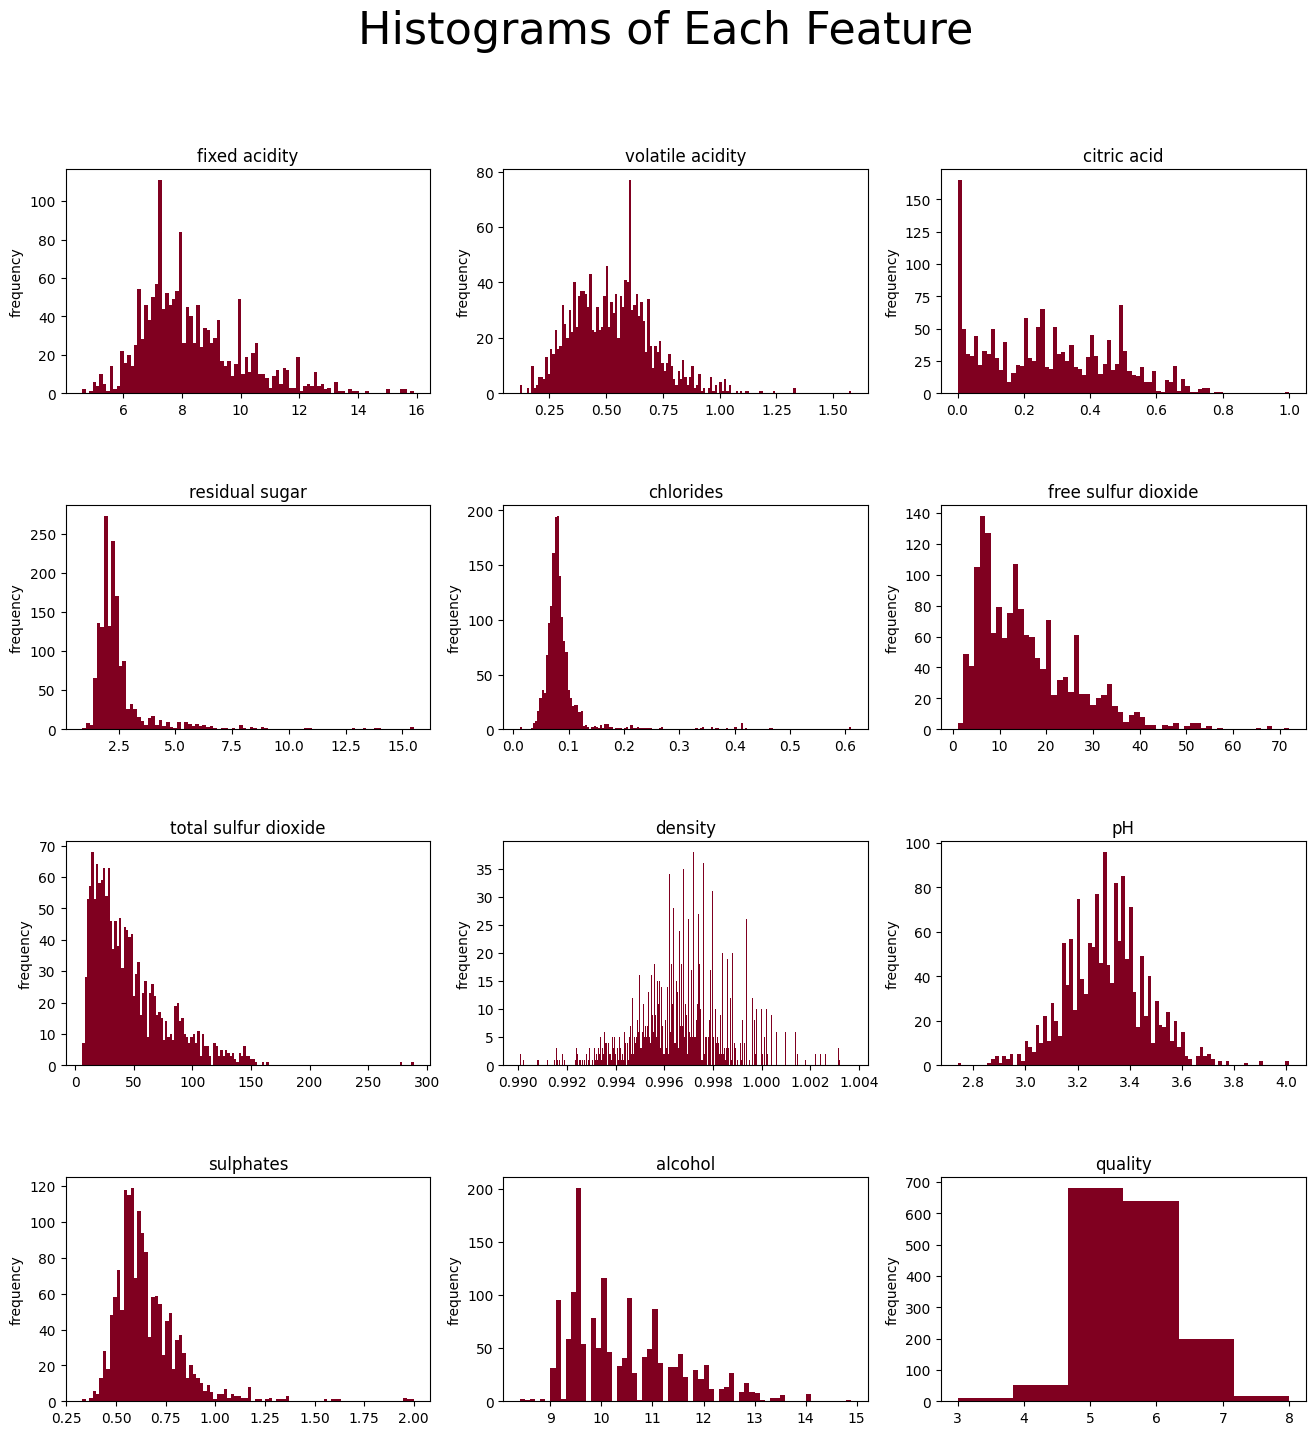

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))

# fig.set_facecolor("#F0E68C")

for idx, col in enumerate(df.columns):
    i = idx // 3
    j = idx % 3

    axes[i, j].hist(df[col], bins=len(df[col].unique()), color = "#800020")
    axes[i, j].set_title(col)
    axes[i, j].set_ylabel("frequency")

fig.suptitle("Histograms of Each Feature", fontsize = 32)

plt.subplots_adjust(hspace=0.5)
plt.show()

2. Correlation with Quality

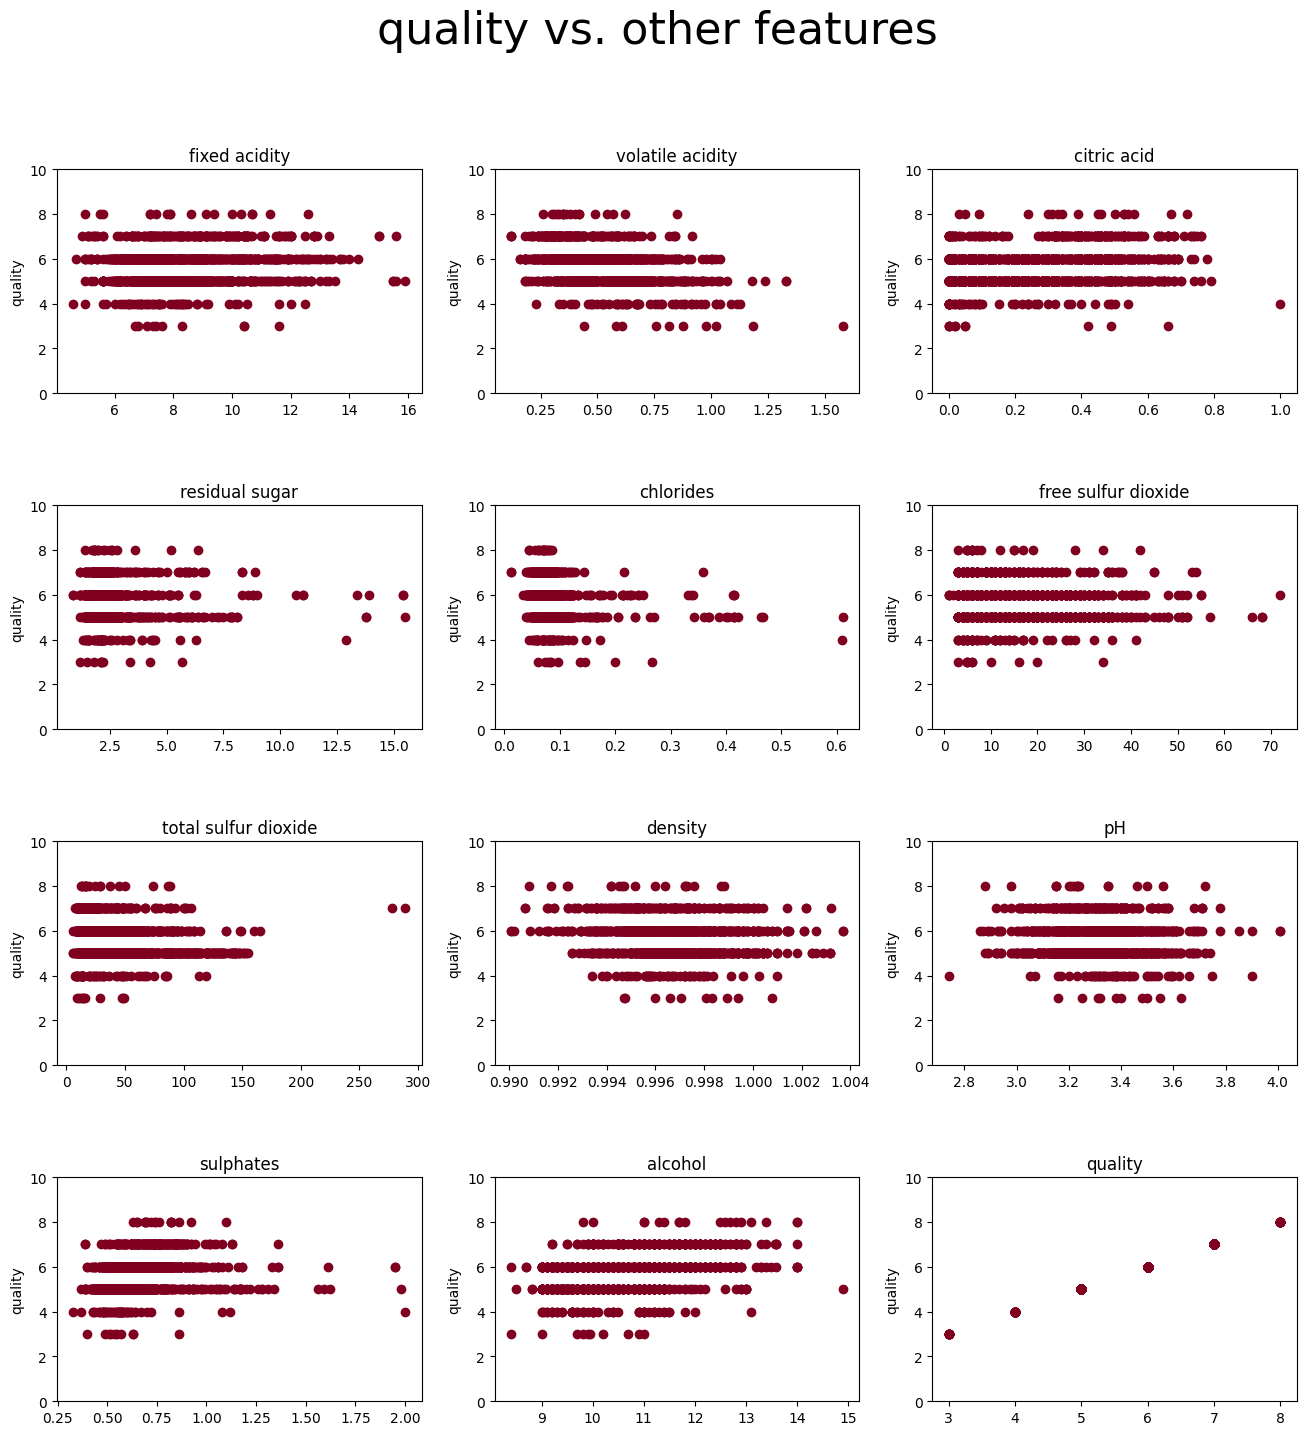

In [7]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))

for idx, col in enumerate(df.columns):
    i = idx // 3
    j = idx % 3

    # axes[i, j].hist(df[col], bins=len(df[col].unique()))
    axes[i,j].scatter(df[col], df["quality"], color = "#800020")
    axes[i, j].set_title(col)
    axes[i, j].set_ylabel("quality")
    axes[i,j].set_ylim(0,10)

fig.suptitle(f"quality vs. other features", fontsize = 32)

plt.subplots_adjust(hspace=0.5)
plt.show()

3. Correlation with Other Features

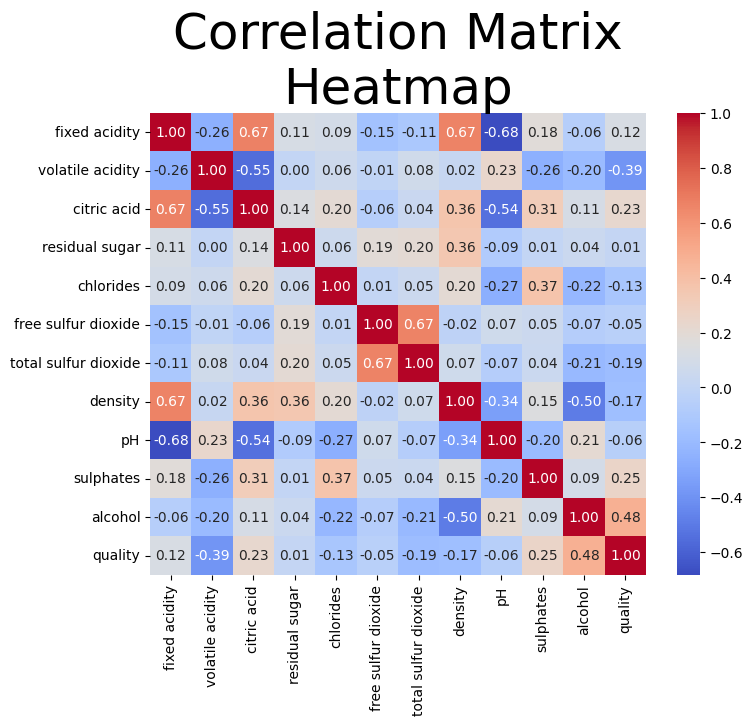

In [15]:
corr_mat = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix\nHeatmap',fontsize = 36)
plt.show()

In [9]:
correlationDf = {
    "Feature 1":[],
    "Feature 2":[],
    "Corr":[],
    "CorrMag":[]
}

for col in corr_mat.columns:
    for idx, corr in enumerate(corr_mat[col]):
        if corr != 1:
            correlationDf["Feature 1"].append(col)
            correlationDf["Feature 2"].append(corr_mat.columns[idx])
            correlationDf["Corr"].append(corr)
            correlationDf["CorrMag"].append(corr if corr >= 0 else -1 * corr)
            
correlationDf = pd.DataFrame(correlationDf).sort_values(by = "CorrMag", ascending=False).reset_index(drop = True)
correlationDf = correlationDf.drop_duplicates(subset = "Corr")
correlationDf[correlationDf["CorrMag"] > 0.5]

,Feature 1,Feature 2,Corr,CorrMag
0,pH,fixed acidity,-0.682978,0.682978
2,citric acid,fixed acidity,0.671703,0.671703
4,density,fixed acidity,0.668047,0.668047
6,free sulfur dioxide,total sulfur dioxide,0.667666,0.667666
8,volatile acidity,citric acid,-0.552496,0.552496
10,citric acid,pH,-0.541904,0.541904


#### Resampling

In [10]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

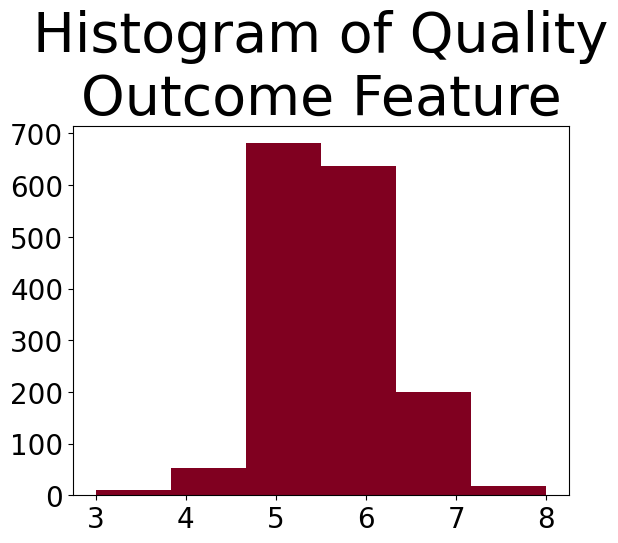

In [13]:
plt.hist(df["quality"], bins = len(df["quality"].unique()), color = "#800020")
plt.title("Histogram of Quality\nOutcome Feature", fontsize = 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [114]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = df[[c for c in df.columns if c != "quality"]].copy()
y = df["quality"].copy()

overSamp = RandomOverSampler(random_state=1)
underSamp = RandomUnderSampler(random_state=1)

over_X, over_y = overSamp.fit_resample(X,y)
under_X, under_y = underSamp.fit_resample(X,y)

* Over Sampling

In [115]:
overSampled = pd.concat([over_X, over_y], axis = 1)
overSampled["quality"].value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

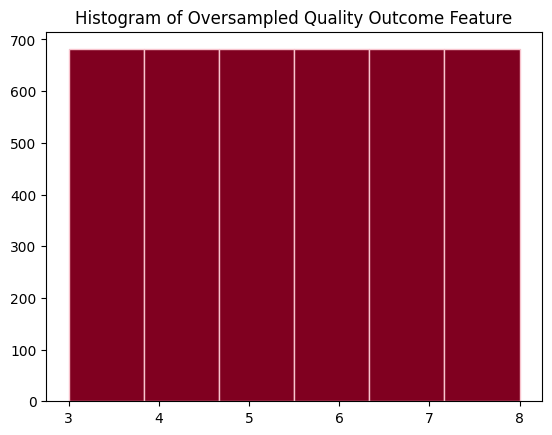

In [116]:
plt.hist(overSampled["quality"], bins = len(overSampled["quality"].unique()),
         color = "#800020", edgecolor = "#F8C3CD")
plt.title("Histogram of Oversampled Quality Outcome Feature")
plt.show()

* Under Sampling

In [117]:
underSampled = pd.concat([under_X, under_y], axis = 1)
underSampled["quality"].value_counts()

3    10
4    10
5    10
6    10
7    10
8    10
Name: quality, dtype: int64

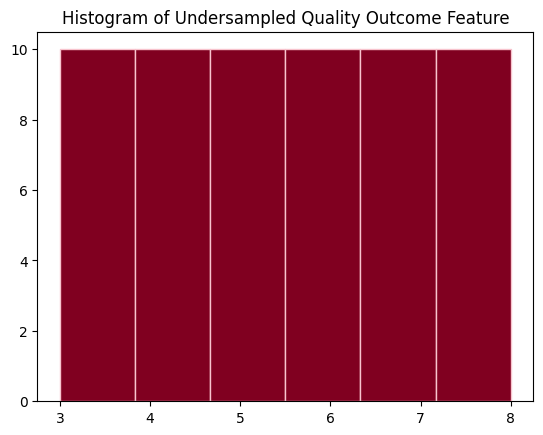

In [118]:

plt.hist(underSampled["quality"], bins = len(underSampled["quality"].unique()),
         color = "#800020", edgecolor = "#F8C3CD")
plt.title("Histogram of Undersampled Quality Outcome Feature")
plt.show()

#### Train-Test Split

In [119]:
from sklearn.model_selection import train_test_split

dataFrames = {
    "normalClass":(X,y),
    "oversampled":(over_X, over_y),
    "undersampled":(under_X, under_y)
}

for k in dataFrames.keys():
    dataFrames[k] = train_test_split(dataFrames[k][0], dataFrames[k][1], test_size = 0.2, random_state=1)

print

#### Normalization

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalizedDfs = {}
for k in dataFrames.keys():
    normalizedDfs[f"{k}_normalized"] = (
        scaler.fit_transform(dataFrames[k][0]),
        scaler.fit_transform(dataFrames[k][1]),
        dataFrames[k][2],
        dataFrames[k][3]
    )

dataFrames.update(normalizedDfs)

#### Output Data

In [139]:
for k in dataFrames:
    filename = f"data/{k}.csv"

    X_train, X_test, y_train, y_test = dataFrames[k]

    training = pd.DataFrame(X_train, columns = df.columns[:-1])
    training["quality"] = list(y_train)
    training["train_test"] = "train"

    test = pd.DataFrame(X_test, columns = df.columns[:-1])
    test["quality"] = list(y_test)
    test["train_test"] = "test"

    assert sum(pd.concat([training, test]).isnull().any(axis=1)) == 0

    pd.concat([training, test]).reset_index(drop = True).to_csv(filename, index = False)